# Histogram Equalization

Implement histogram equalization and apply to Cheetah.png. Update show_imghist() to take two images and produce a 2x2 grid of those images and their histograms. The first image should be the original image. The second image should be the histogram equalized image. Update the metadata to include YOUR NAME. Submit a clean ipynb file that can run and produce the requested output.

ECE472: Use skimage.exposure.equalize_hist() to perform the enhancement.

ECE572: Implement equalize_hist(image, nbins=256). Use skimage.exposure.histogram() to produce a histogram for the image along with associated bin centers. Use numpy.cumsum() to calculate the cumulative distribution for the histogram. Remember to rescale so CDF[-1] = 1. Use numpy.interp() to interpolate image intensity values given image.flat, the bin centers and the cumulative distribution function. Reshape the result to the shape of the input image.

BONUS: For bragging rights, implement equalize_hist(image, nbins=256, use_sqrt=False) where the use_sqrt argument controls whether to use histogram values $H_i$ or $\sqrt{H_i}$ when forming the cumulative distribution. Show the result of use_sqrt=False and use_sqrt=True.

In [221]:
%matplotlib inline
import matplotlib.pyplot as plt
import skimage
import numpy as np

from skimage import io
from skimage import exposure
from skimage.util import img_as_float32 as img_as_float


# Load packages need

In [222]:
def print_imginfo(I):
    print(type(I))
    print(I.shape, I.dtype)
    print("Data Range: ", np.min(I), "to", np.max(I))
    # Print image type, image shape and dtype, image min and max values

In [223]:
def show_imghist(I1, I2, I3):
    fig, ax = plt.subplots(3,2, figsize =(10,5))

    fig.subplots_adjust(hspace=0.75, wspace=0.0)
    
    ax[0,0].imshow(I1, cmap='gray', vmin=0.0, vmax=1.0)
    ax[0,0].set_axis_off()
    ax[0,0].set_title("Original Image")
    
    
    ax[0,1].hist(I1.ravel(), lw=0, bins=256)
    ax[0,1].set_xlim(0.0,1.0)
    ax[0,1].set_yticks([])
    ax[0,1].set_title("Original Image - Histogram")

    ax[1, 0].imshow(I2, cmap='gray', vmin=0.0, vmax=1.0)
    ax[1,0].set_axis_off()
    ax[1,0].set_title("Histogram Equalized Image")
    
    ax[1,1].hist(I2.ravel(), lw=0, bins=256)
    ax[1,1].set_xlim(0.0,1.0)
    ax[1,1].set_yticks([])
    ax[1,1].set_title("Histogram Equalized Image - Histogram")

    ax[2,0].imshow(I3, cmap='gray', vmin=0.0, vmax=1.0)
    ax[2,0].set_axis_off()
    ax[2,0].set_title("Square Rooted Image")

    ax[2,1].hist(I3.ravel(), lw=0, bins=256)
    ax[2,1].set_xlim(0.0,1.0)
    ax[2,1].set_yticks([])
    ax[2,1].set_title("Square Rooted Image - Histogram")

    

    # All students

In [224]:
def equalize_hist(I1,nbins=256,use_sqrt=False):
    # print("this runs")
    I2 = I1
    # TODO: don't use scikit-image exposure to do this, implement yourself according to instructions
    hist, bin_centers = exposure.histogram(I2, nbins=nbins)
    x = np.cumsum(hist)
    y = x/x[-1]
    z = np.interp(I2.flat, bin_centers, y)
    z = np.reshape(z,I1.shape)
    I2 = z
    if use_sqrt is True:
        I2 = np.sqrt(I2)
    
    #print("hist:", hist)
   # print("bins:", bin_centers)
    #print(f"x: {x}")
   # print(f"y: {y}")
    return I2.astype(I1.dtype, copy=False)

<class 'numpy.ndarray'>
(321, 481) float32
Data Range:  0.053054903 to 0.86688787
<class 'numpy.ndarray'>
(321, 481) float32
Data Range:  6.476642e-06 to 1.0


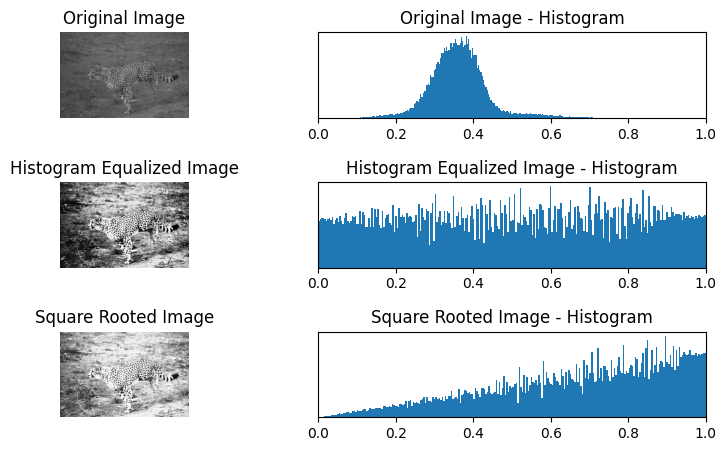

In [225]:

# Read input image, convert to float32
I1 = io.imread("./cheetah.png", as_gray = True)
I1 = img_as_float(I1)

# Perform histogram equalization
I2 = equalize_hist(I1, nbins=256)
I3 = equalize_hist(I1, nbins=256, use_sqrt = True)


# Print image info for inputnbins image
print_imginfo(I1)

# Print image info for output image
print_imginfo(I2)
# Show both images and their histograms
show_imghist(I1, I2, I3)

